In [216]:
#K-means & PCA Assignment:
#importing clustering kmeans lib
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
#to visualize
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

In [217]:
#1. Apply K means clustering to credit card dataset: CC.csv
#data importing from csv file
dataset = pd.read_csv('CC.csv')

In [218]:
#Remove any null values by the mean.
#finding null values in the data set
dataset.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [219]:
#filling null values with means 
column_means = dataset.mean()
dataset = dataset.fillna(column_means)
dataset.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [220]:
#setting training data
dataset_X = dataset.iloc[:,1:-1]

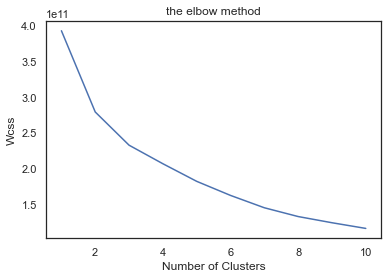

In [222]:
#Use the elbow method to find a good number of clusters with the K-Means algorithm
#using elbow method and finding best value for clustering 
wcss = []  
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,max_iter=300,random_state=0)
    kmeans.fit(dataset_X)
    wcss.append(kmeans.inertia_)
#ploting in graph
plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [223]:
#Calculate the silhouette score for the above clustering.
km = KMeans(n_clusters=3)
km.fit(dataset_X)
cluster_kmeans= km.predict(dataset_X)
from sklearn import metrics
score = metrics.silhouette_score(dataset_X, cluster_kmeans)
print('normal score:', score)

normal score: 0.46765520284747175


In [224]:
#2. Try feature scaling and then apply K-Means on the scaled features. Did that improve the Silhouette score?
from sklearn.preprocessing import StandardScaler

In [225]:
#importing standard scaler object and fit our data into that object, so there by u can be reduced by mean and divided by varience
scaler = StandardScaler()
# To scaling data
datasc=scaler.fit_transform(dataset_X)

In [226]:
#building a model for feature scaling data set
from sklearn.cluster import KMeans
nclusters = 3 # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(datasc)

KMeans(n_clusters=3)

In [227]:
# calculating the silhouette_score for feature scaled data
y_cluster_kmeans = km.predict(datasc)
from sklearn import metrics
score = metrics.silhouette_score(datasc, y_cluster_kmeans)
#we can see that after feature scaling score reduced
print(score)

0.26728393528907846


In [214]:
#Bones
#Apply PCA on the same dataset. Apply K-Means algorithm on the PCA result and report your observation if the silhouette score improved or not?
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pcascale = pca.fit_transform(dataset_X)
principalDf = pd.DataFrame(data = x_pcascale, columns = ['PCA_1', 'PCA_2'])
km = KMeans(n_clusters=3)
km.fit(principalDf)
Y_cluster_kmeans= km.predict(principalDf)
from sklearn import metrics
pca_means_scale_score = metrics.silhouette_score(principalDf, Y_cluster_kmeans)
#pca score is improved 
print('PCA KMEANS  score is:', pca_means_scale_score)

PCA KMEANS  score is: 0.5720155560111958


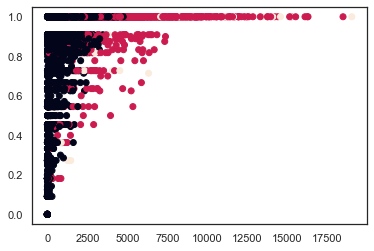

In [215]:
#ploting after on normal dataset after kmeans clustering
plt.scatter(dataset_X.iloc[:, 0],dataset_X.iloc[:, 1], c = cluster_kmeans)
plt.show()

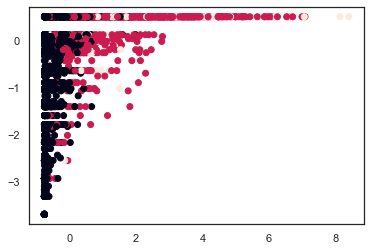

In [229]:
#ploting the data after appling feature scaling
plt.scatter(datasc[:, 0],datasc[:, 1], c = y_cluster_kmeans)
plt.show()

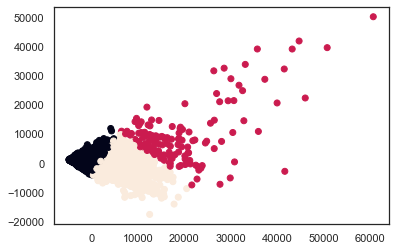

In [230]:
#ploting the data after appling pca
plt.scatter(x_pcascale[:, 0],x_pcascale[:, 1], c = Y_cluster_kmeans)
plt.show()